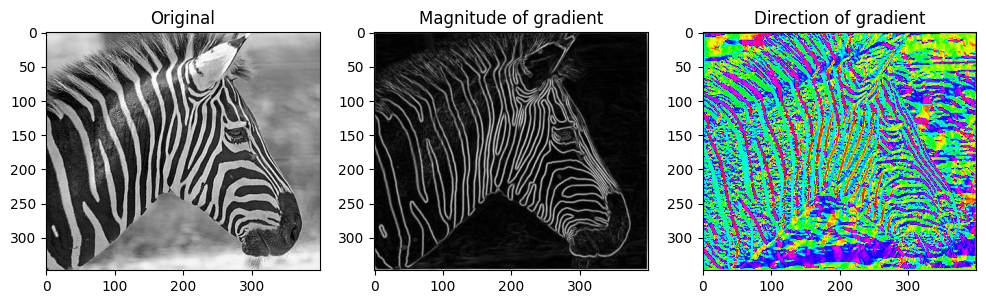

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.signal import convolve2d

sigma1 = 1
sigma3 = 3
x = np.arange(-5, 6)
y = np.arange(-5, 6)
xx, yy = np.meshgrid(x, y)
r = np.sqrt(xx**2 + yy**2)
G1 = np.exp(-(r**2) / (2*(sigma1**2))) / (2*math.pi*(sigma1**2))
G3 = np.exp(-(r**2) / (2*(sigma3**2))) / (2*math.pi*(sigma3**2))
G1x = -xx * (1/(sigma1**2)) * G1
G1y = -yy * (1/(sigma1**2)) * G1
G3x = -xx * (1/(sigma3**2)) * G3
G3y = -yy * (1/(sigma3**2)) * G3

# Load the grayscale version of the image
img = mpimg.imread('IMAGES/zebrahead.jpg')
gray_img = img.mean(axis=2)

# Compute the x and y derivatives using the sigma=1 kernels
dx = convolve2d(gray_img, G1x, mode='same')
dy = convolve2d(gray_img, G1y, mode='same')

# Compute the magnitude and direction of the gradient
mag = np.sqrt(dx**2 + dy**2)
dir = np.arctan2(dy, dx)

# Display the results
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
ax1.imshow(gray_img, cmap='gray')
ax1.set_title('Original')
ax2.imshow(mag, cmap='gray')
ax2.set_title('Magnitude of Gradient')
ax3.imshow(dir, cmap='hsv')
ax3.set_title('Direction of Gradient')
plt.show()
